#     TWEET SENTIMENT EXTRACTION

Evaluating the sentiment of tweets based on words and phrases they contain. 

We want to start by extracting the files from kaggle. The competition is called 'Tweet Sentiment Extraction'. It can be extracted using the code below. 

In [ ]:
#!kaggle competitions download -c tweet-sentiment-extraction
#!unzip -o tweet-sentiment-extraction.zip




In [3]:
import pandas as pd


In [4]:
def ReadCsv(data_path): 
    data = pd.read_csv(data_path)
    data.text = data.text.astype(str) 
    if data_path == 'train.csv': 
        data.text = data.selected_text.astype(str) 
    return data

orig_train = ReadCsv('train.csv') 
orig_test = ReadCsv('test.csv') 
train = ReadCsv('cleaned_train.csv') 
test = ReadCsv('cleaned_test.csv') 

In [ ]:
orig_train.shape

In [5]:
## We want to see if we have any null variables in the test or the train dataset. 

print('\n train \n ')
print(train.isna().sum())
print('\n test \n ')
print(test.isna().sum())


 train 
 
Unnamed: 0        0
Unnamed: 0.1      0
Unnamed: 0.1.1    0
textID            0
text              0
selected_text     0
sentiment         0
clean_text        0
dtype: int64

 test 
 
Unnamed: 0         0
Unnamed: 0.1       0
Unnamed: 0.1.1     0
textID             0
text               0
sentiment          0
clean_text        10
dtype: int64


In [6]:
## The train has one row with null variables. Unfortunately, because these are strings, these is no way we can assign a value to these null values without impacting our final model. So we are going to drop this one row. 

train.dropna(inplace = True) 

In [7]:
## Now we can see that there are no null variables. 

print('\n train \n ')
print(train.isna().sum())
print('\n test \n ')
print(test.isna().sum())


 train 
 
Unnamed: 0        0
Unnamed: 0.1      0
Unnamed: 0.1.1    0
textID            0
text              0
selected_text     0
sentiment         0
clean_text        0
dtype: int64

 test 
 
Unnamed: 0         0
Unnamed: 0.1       0
Unnamed: 0.1.1     0
textID             0
text               0
sentiment          0
clean_text        10
dtype: int64


In [8]:
## We want to clean the tweets up. We want to clean up website addresses, punctuation, and stop words. 

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re



In [9]:


def RemoveStopWords(text): 

    ## Remove the stop words using the nltk package. 
    
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
    return ' '.join(tokens_without_sw )


In [10]:


    


def CleanText(text): 

    ## Clean up the tweets (punctuation, websites) using the re package

    text = str(text).lower() 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('https:', '', text)
    text = re.sub("[-'.,)(#<!:/?]", '', text)
    text = RemoveStopWords(text) 
    



    return text 



In [ ]:
 
train['clean_text'] = train.text.apply(lambda x: CleanText(x))

test['clean_text'] = test.text.apply(lambda x: CleanText(x) )

train.head()


In [11]:
## We want to output the data to csv because processing the data took 30 minutes. 
train.to_csv('cleaned_train.csv', index = True) 
test.to_csv('cleaned_test.csv', index = True)

In [12]:
import pandas as pd 
train = pd.read_csv('cleaned_train.csv') 
test = pd.read_csv('cleaned_test.csv') 
train['number_characters'] = train.text.str.len()
train['number_clean_characters'] = train.clean_text.str.len()
train['number_characters'] = test.text.str.len()
train['number_clean_characters'] = test.clean_text.str.len()
train.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,textID,text,selected_text,sentiment,clean_text,number_characters,number_clean_characters
0,0,0,0,0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,` responded going,49.0,16.0
1,1,1,1,1,549e992a42,Sooo SAD,Sooo SAD,negative,sooo sad,103.0,77.0
2,2,2,2,2,088c60f138,bullying me,bullying me,negative,bullying,78.0,53.0
3,3,3,3,3,9642c003ef,leave me alone,leave me alone,negative,leave alone,12.0,10.0
4,4,4,4,4,358bd9e861,"Sons of ****,","Sons of ****,",negative,sons * * * *,39.0,4.0


In [13]:
def GroupBySentiment(data): 

    ## We want to split the data by sentiment.

    text_sentiment_count = data.groupby(['sentiment'], as_index = False).text.count()
    positive_text = data[data.sentiment == 'positive']
    negative_text = data[data.sentiment == 'negative']
    neutral_text = data[data.sentiment == 'neutral']
    return text_sentiment_count, positive_text, negative_text, neutral_text

train_text_sentiment_count, train_positive_text, train_negative_text, train_neutral_text = GroupBySentiment(train)
test_text_sentiment_count, test_positive_text, test_negative_text, test_neutral_text = GroupBySentiment(test)

In [14]:
def PlotSentimentCount(data, axis, title): 

    ## Tweet Counts by Sentiment

    sns.barplot(x = 'sentiment', y = 'text', data = data, ax = ax[axis]) 
    ax[axis].set_xlabel('Sentiment') 
    ax[axis].set_ylabel('Text Count') 
    ax[axis].set_title(title)

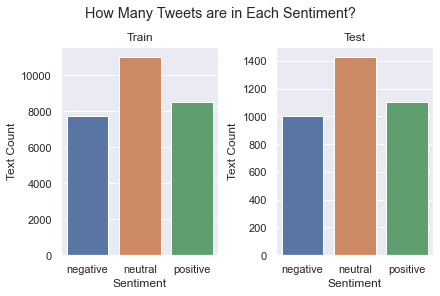

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set() 



fig, ax = plt.subplots(1, 2, constrained_layout = True )
fig.suptitle('How Many Tweets are in Each Sentiment?') 
PlotSentimentCount(train_text_sentiment_count, 0, 'Train')
PlotSentimentCount(test_text_sentiment_count, 1, 'Test') 

In [16]:
## Most Common Words in Selected Text 
import numpy as np
import collections

def Words(data): 

    ## Word Counts 

    words = data.clean_text.apply(lambda x: str(x).split())
    words = collections.Counter([item for sublist in words for item in sublist]) 
    words = pd.DataFrame(words, index = [0]).T 
    words.columns = ['Count'] 
    words = words.sort_values(by = 'Count', ascending = False) 
    words = words[(words.index != '*')]
    words = words[(words.index != "`")]
    return words.head(50)

train_neutral_words = Words(train_neutral_text)
train_positive_words = Words(train_positive_text) 
train_negative_words = Words(train_negative_text) 
train_words = Words(train)



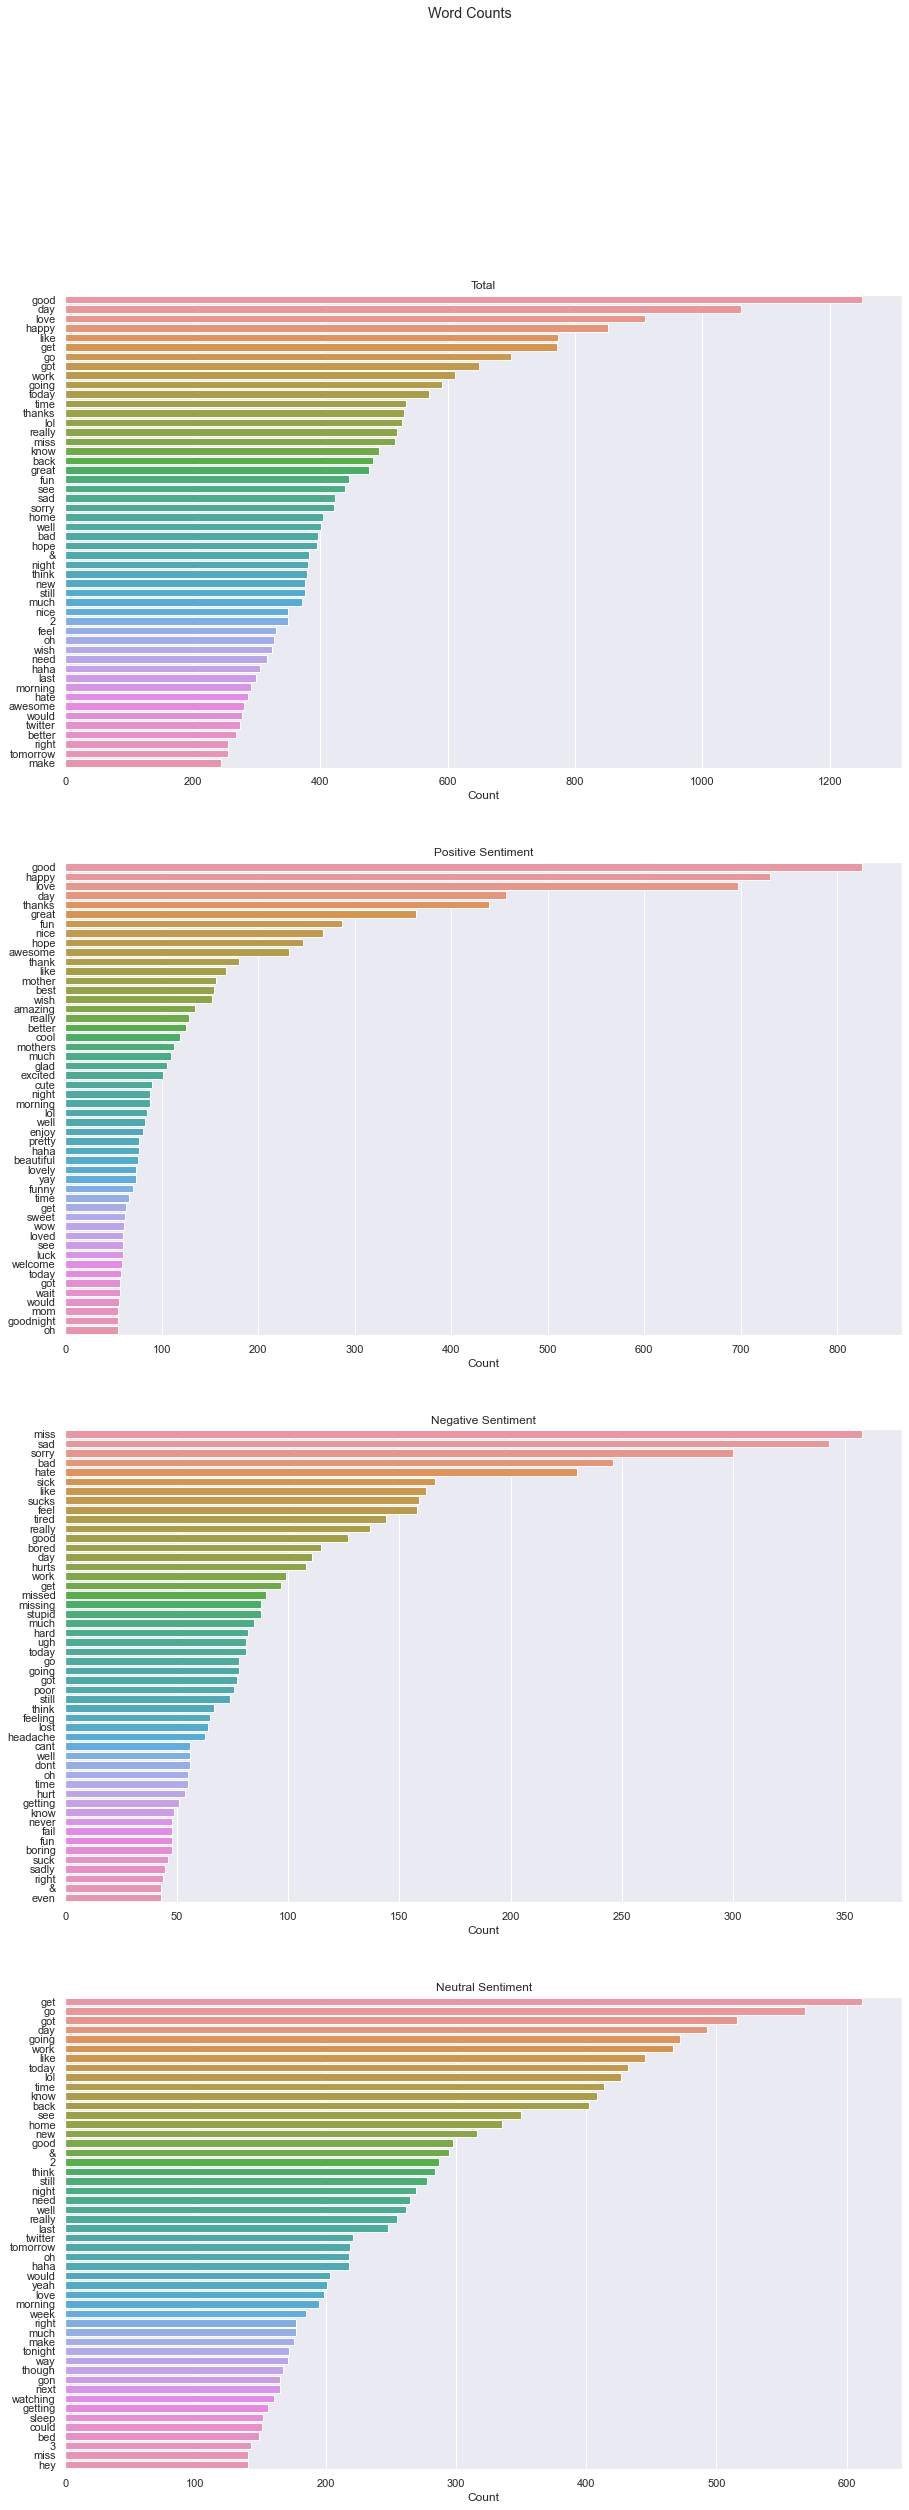

In [36]:
fig, ax = plt.subplots(4,1, figsize = (15, 40))
fig.suptitle('Word Counts')

def PopularWords(data, axis, title): 

    ## Plot the Word Counts

    sns.barplot(x = data.Count, y = data.index, ax = ax[axis])
    ax[axis].set_title(title)

PopularWords(train_words, 0, 'Total')
PopularWords(train_positive_words, 1, 'Positive Sentiment') 
PopularWords(train_negative_words, 2, 'Negative Sentiment') 
PopularWords(train_neutral_words, 3, 'Neutral Sentiment') 

fig.savefig('WordCounts.jpg')



In [37]:
## Word Distribution Descriptive Stats

words_distribution_description = train_positive_words.describe().T

words_distribution_description = words_distribution_description.append(train_negative_words.describe().T) 

words_distribution_description = words_distribution_description.append(train_neutral_words.describe().T) 
words_distribution_description = words_distribution_description.append(train_words.describe().T)

words_distribution_description.index = ['Positive', 'Negative', 'Neutral', 'Train']

words_distribution_description['Sentiment'] = words_distribution_description.index

words_distribution_description

,count,mean,std,min,25%,50%,75%,max,Sentiment
Positive,50.0,162.64,177.949633,55.0,62.25,88.0,155.50,826.0,Positive
Negative,50.0,102.84,75.007308,43.0,55.00,78.0,114.00,358.0,Negative
Neutral,50.0,276.36,126.275009,140.0,173.00,234.5,346.25,612.0,Neutral
Train,50.0,469.16,213.664467,245.0,325.00,398.5,531.00,1251.0,Train


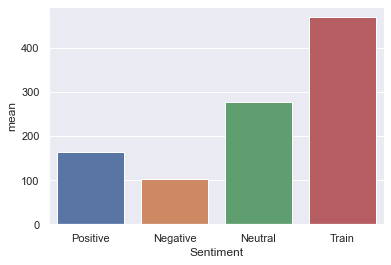

In [40]:
## Bar plot of the mean of the word count by sentiment. 
sns.barplot(x = 'Sentiment', y = 'mean', data = words_distribution_description) 

In [42]:
## Calculate the means of the number of characters of tweets based by sentiment


positive_means = [train_positive_text.number_characters.mean(), train_positive_text.number_clean_characters.mean()] 
negative_means = [train_negative_text.number_characters.mean(), train_negative_text.number_clean_characters.mean()] 
neutral_means = [train_neutral_text.number_characters.mean(), train_neutral_text.number_clean_characters.mean()] 
train_means = [train.number_characters.mean(), train.number_clean_characters.mean()]


means = {'Positive Mean': positive_means, 
            'Negative Mean': negative_means, 
            'Neutral Mean': neutral_means, 
            'Total Mean': train_means}
means = pd.DataFrame(means).transpose()
means.columns = ['NumberCharacters', 'NumberCleanCharacters']
means

,NumberCharacters,NumberCleanCharacters
Positive Mean,67.232538,41.722272
Negative Mean,67.459566,41.758144
Neutral Mean,68.417567,42.544075
Total Mean,67.763441,42.055335


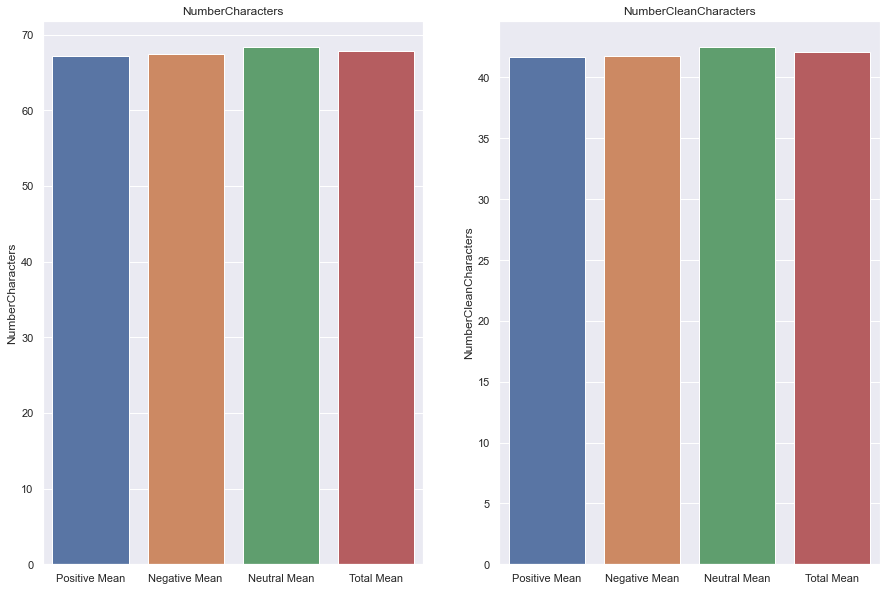

In [46]:
fig, ax = plt.subplots(1,2, figsize = (15, 10) )

def PlotMeans(data, clean_or_dirty, axis): 
    
    ## Means of the character count

    sns.barplot(x = data.index, y = data[clean_or_dirty], ax = ax[axis] ).set_title(clean_or_dirty)

j = 0
for column in means.columns: 
    PlotMeans(means, column, j)
    j+=1




In [47]:
train.number_characters.describe()

count    3534.000000
mean       67.763441
std        35.577522
min         4.000000
25%        38.000000
50%        63.000000
75%        96.750000
max       142.000000
Name: number_characters, dtype: float64

Text(0.5, 1.0, 'Train Uncleaned')

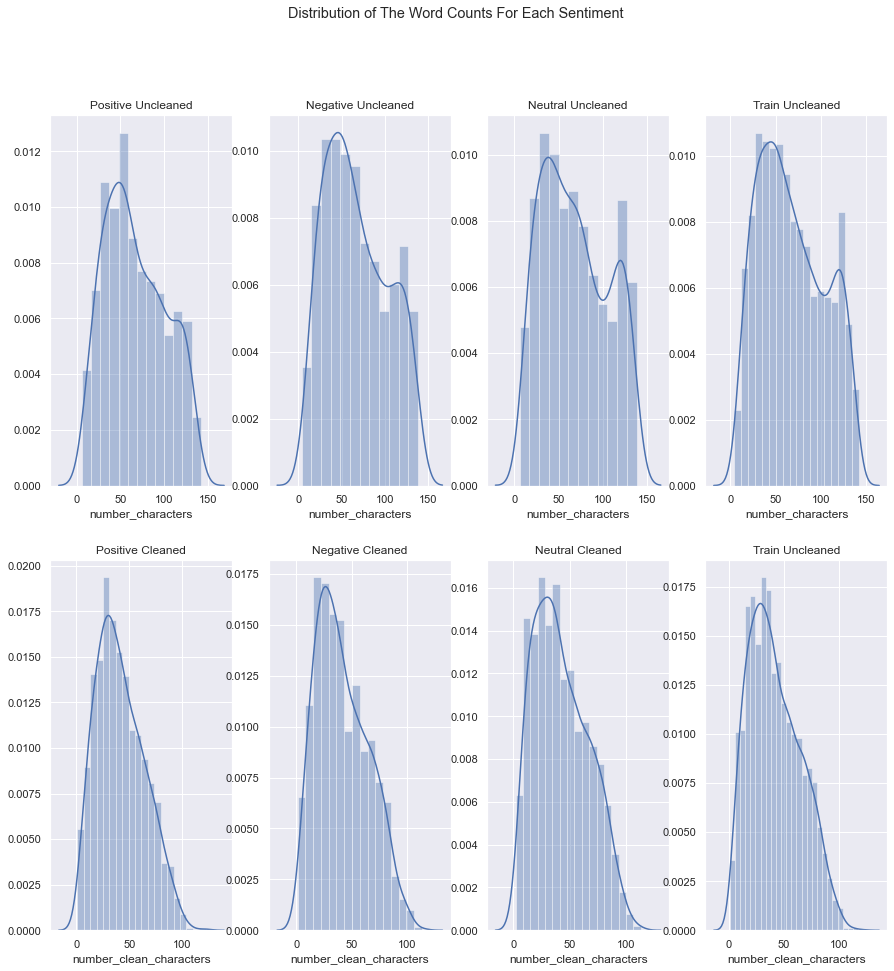

In [48]:
## Distribution of the Word Counts for each sentiment

fig, ax = plt.subplots(2, 4, figsize = (15, 15))
plt.suptitle('Distribution of The Word Counts For Each Sentiment')



sns.distplot(train_positive_text.number_characters, ax = ax[0,0]).set_title('Positive Uncleaned') 
sns.distplot(train_negative_text.number_characters, ax = ax[0,1]).set_title('Negative Uncleaned') 
sns.distplot(train_neutral_text.number_characters, ax = ax[0,2]).set_title('Neutral Uncleaned') 
sns.distplot(train.number_characters, ax = ax[0,3]).set_title('Train Uncleaned') 


sns.distplot(train_positive_text.number_clean_characters, ax = ax[1,0]).set_title('Positive Cleaned') 
sns.distplot(train_negative_text.number_clean_characters, ax = ax[1,1]).set_title('Negative Cleaned') 
sns.distplot(train_neutral_text.number_clean_characters, ax = ax[1,2]).set_title('Neutral Cleaned') 
sns.distplot(train.number_clean_characters, ax = ax[1,3]).set_title('Train Uncleaned') 





